In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams

# --- Setup Matplotlib for consistent font rendering ---
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'DejaVu Sans'
%matplotlib inline

In [41]:
Dep = pd.read_csv('/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/git_repo/Data/Dep.csv', index_col=0)

In [42]:
Dep.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
StrippedCellLineName,,,,,,,,,,,,,,,,,,,,,
127399,0.049776,0.066429,0.013483,0.007944,0.013400,0.071582,0.037770,0.004610,0.007946,0.007958,...,0.488152,0.101358,0.013670,0.010754,0.027511,0.008228,0.027564,0.010735,0.185723,0.667858
143B,0.034421,0.043571,0.011762,0.024692,0.050581,0.072212,0.008456,0.157869,0.015413,0.009776,...,0.186408,0.455001,0.070519,0.023477,0.053847,0.079360,0.187128,0.010162,0.104770,0.054319
170MGBA,0.054948,0.064456,0.012188,0.058431,0.126369,0.084924,0.034410,0.770261,0.125836,0.004042,...,0.152137,0.669006,0.014776,0.015699,0.088288,0.103552,0.198547,0.102366,0.044008,0.324796
22RV1,0.074552,0.000768,0.003335,0.009166,0.060044,0.125401,0.060944,0.118213,0.005341,0.010546,...,0.160564,0.667312,0.007161,0.004016,0.033642,0.052478,0.167843,0.010017,0.195273,0.353728
2313287,0.030826,0.069089,0.000535,0.003591,0.071325,0.007278,0.024455,0.044887,0.006855,0.000424,...,0.190996,0.919661,0.002602,0.000513,0.005846,0.025248,0.068227,0.005842,0.088149,0.252757


In [43]:
ic50 = pd.read_csv("/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/git_repo/Data/Creammist_common_ic50.csv", index_col = 0)
ic50.head()

,1321N1,2004,22RV1,2313287,253J,253JBV,42MGBA,451LU,5637,639V,...,YD10B,YD15,YD38,YD8,YH13,YKG1,YMB1E,YT,ZR751,ZR7530
drug,,,,,,,,,,,,,,,,,,,,,
ABIRATERONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.67829,NaN,NaN,NaN,NaN,5.84745,NaN
ABT-751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.899170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFATINIB,NaN,1.47,2.80303,1.54454,0.28527,1.44631,2.59555,4.03959,-0.082677,2.51988,...,-5.26158,-2.81338,-3.85876,NaN,2.82189,3.96671,2.836040,2.38864,2.79599,-3.31245
AFURESERTIB,NaN,NaN,2.11144,1.40029,NaN,NaN,1.29770,4.46337,5.424960,4.97438,...,NaN,NaN,NaN,NaN,4.30362,5.06393,-0.983684,1.67375,NaN,3.62934
ALECTINIB,NaN,NaN,4.80222,3.94753,NaN,NaN,4.80889,4.70821,5.056080,4.09390,...,NaN,NaN,NaN,NaN,4.39350,3.48317,4.389940,3.03112,NaN,2.24762


In [44]:
# Extract EGFR dependency series
egfr_dep = Dep['EGFR'].dropna()

# Extract Erlotinib IC50 row
erlotinib_ic50 = ic50.loc['ERLOTINIB'].dropna()
# Find common cell lines
common_cell_lines = egfr_dep.index.intersection(erlotinib_ic50.index)

print(f"Number of common cell lines: {len(common_cell_lines)}")


Number of common cell lines: 687


In [45]:
egfr_common = egfr_dep.loc[common_cell_lines]


In [46]:
# --- Paths ---
import os


out_path = "/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/git_repo/Figs/Fig1/Fig1d.pdf"

# Make sure directory exists
os.makedirs(os.path.dirname(out_path), exist_ok=True)

### KDE plot

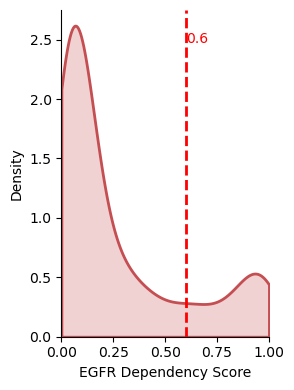

In [47]:
plt.figure(figsize=(3, 4))

sns.kdeplot(
    egfr_common,
    fill=True,
    color="#c44e52",
    linewidth=2,
    clip=(0, 1)
)

# Cutoff line
plt.axvline(
    x=0.6,
    color="red",
    linestyle="--",
    linewidth=2
)

plt.text(
    0.6,
    plt.ylim()[1] * 0.9,
    "0.6",
    color="red",
    ha='left'
)

plt.xlim(0, 1)
plt.xlabel("EGFR Dependency Score")
plt.ylabel("Density")

sns.despine()
plt.tight_layout()

plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()


### Boxplot

P-value: 1.87e-09


/tmp/ipykernel_3598328/3508241279.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(


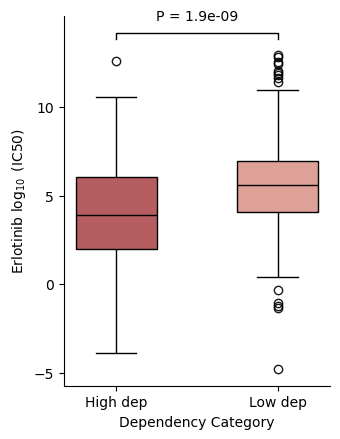

In [70]:
from scipy import stats

# Get Erlotinib IC50 for common cell lines
erlotinib_common = erlotinib_ic50.loc[common_cell_lines]

# Create groups based on 0.6 cutoff
high_dep_cells = egfr_common[egfr_common >= 0.6].index
low_dep_cells = egfr_common[egfr_common < 0.6].index

# Get IC50 values for each group
high_dep_ic50 = erlotinib_common.loc[high_dep_cells]
low_dep_ic50 = erlotinib_common.loc[low_dep_cells]

# Perform Mann-Whitney U test
stat, pvalue = stats.mannwhitneyu(high_dep_ic50, low_dep_ic50, alternative='two-sided')
print(f"P-value: {pvalue:.2e}")

# Prepare data for boxplot
plot_data = pd.DataFrame({
    'Dependency Category': ['High dep'] * len(high_dep_ic50) + ['Low dep'] * len(low_dep_ic50),
    'Erlotinib log10 (IC50)': list(high_dep_ic50) + list(low_dep_ic50)
})

# Create boxplot
fig, ax = plt.subplots(figsize=(3.5, 4.5))

box = sns.boxplot(
    x='Dependency Category',
    y='Erlotinib log10 (IC50)',
    data=plot_data,
    palette=['#c44e52', '#e8998d'],
    order=['High dep', 'Low dep'],
    width=0.5,
    ax=ax,
    linewidth=1,
    boxprops=dict(edgecolor='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='black'),
    flierprops=dict(markeredgecolor='black', marker='o', alpha=0.9, markerfacecolor='none')
)

# Add p-value annotation
y_max = plot_data['Erlotinib log10 (IC50)'].max()
y_range = plot_data['Erlotinib log10 (IC50)'].max() - plot_data['Erlotinib log10 (IC50)'].min()
bar_height = y_max + y_range * 0.05

# Draw the bracket
ax.plot([0, 0, 1, 1], [bar_height, bar_height + y_range*0.02, bar_height + y_range*0.02, bar_height], 
        lw=1, color='black')
ax.text(0.5, bar_height + y_range*0.05, f'P = {pvalue:.1e}', ha='center', va='bottom', fontsize=10)

ax.set_ylabel(r'Erlotinib $\log_{10}$ (IC50)')
ax.set_xlabel('Dependency Category')

ax.set_yticks([-5, 0, 5, 10])

# Ensure axis spines are black
for spine in ax.spines.values():
    spine.set_edgecolor('black')
ax.tick_params(axis='both', colors='black')

sns.despine()
plt.tight_layout()

# Save figure
out_path_boxplot = "/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/git_repo/Figs/Fig1/Fig1e.pdf"
plt.savefig(out_path_boxplot, dpi=600, bbox_inches="tight")
plt.show()